# Assignment 2

In [1]:
# All libraries required
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import layers

2024-05-15 23:09:46.431431: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 23:09:47.032527: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 23:09:48.884777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Tensorflow Version
print(tf.__version__)

2.16.1


In [3]:
# Allocate more memory - https://www.tensorflow.org/guide/gpu

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2024-05-15 23:09:51.406968: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 23:09:51.849969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 23:09:51.850011: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 23:09:51.874307: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 23:09:51.874379: I external/local_xla/xla/stream_executor

In [4]:
# Plotting history graph
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

## Model 1: Grayscale

In [5]:
# Get data - https://www.tensorflow.org/tutorials/load_data/images#load_data_using_a_keras_utility

# Parameters
batch_size = 125912
IMG_SIZE = (512, 512)
data_dir = './hagridset'
seed_no = 388741
validation_split = 0.3

# Dataset - https://stackoverflow.com/questions/66036271/splitting-a-tensorflow-dataset-into-training-test-and-validation-sets-from-ker

# Auto split to training set (70%)
training_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       validation_split = validation_split,
                                                       subset = 'training',
                                                       seed = seed_no,
                                                       color_mode = 'grayscale',
                                                       shuffle = True)

# Auto split to validation set and test set (30%)
validation_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       validation_split = validation_split,
                                                       subset = 'validation',
                                                       seed = seed_no,
                                                       color_mode = 'grayscale',
                                                       shuffle = True)

# Split further to validation set (10%) and test set (20%)
validation_batches = tf.data.experimental.cardinality(validation_data_set)
test_data_set = validation_data_set.take((2 * validation_batches) // 3)
validation_data_set = validation_data_set.skip((2 * validation_batches) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [6]:
# Number of classes
num_classes = len(training_data_set.class_names)
num_classes

# Model building
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 1)))
model.add(layers.Conv2D(12, 3, strides=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(18, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(24, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(192, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(192, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 12)   │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 18)   │         1,962 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 24)     │         3,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         6,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 96)       │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         3,474 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441,004 (1.68 MB)

 Trainable params: 441,004 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(training_data_set, validation_data=validation_data_set, epochs=50, callbacks=[callback])

Epoch 1/50


I0000 00:00:1715811159.547337   21083 service.cc:145] XLA service 0x7f4ef4012150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715811159.547470   21083 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-15 23:12:39.660278: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 23:12:39.927909: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


   5/2755 ━━━━━━━━━━━━━━━━━━━━ 1:28 32ms/step - accuracy: 0.1045 - loss: 3.7119 

I0000 00:00:1715811168.113447   21083 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2755/2755 ━━━━━━━━━━━━━━━━━━━━ 118s 39ms/step - accuracy: 0.1709 - loss: 2.5742 - val_accuracy: 0.5293 - val_loss: 1.4773
Epoch 2/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 105s 38ms/step - accuracy: 0.5732 - loss: 1.3183 - val_accuracy: 0.6527 - val_loss: 1.0671
Epoch 3/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 111s 40ms/step - accuracy: 0.6802 - loss: 0.9862 - val_accuracy: 0.7098 - val_loss: 0.9138
Epoch 4/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 107s 39ms/step - accuracy: 0.7336 - loss: 0.8233 - val_accuracy: 0.7163 - val_loss: 0.8813
Epoch 5/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 112s 41ms/step - accuracy: 0.7633 - loss: 0.7261 - val_accuracy: 0.7412 - val_loss: 0.8541
Epoch 6/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 105s 38ms/step - accuracy: 0.7880 - loss: 0.6500 - val_accuracy: 0.7467 - val_loss: 0.8056
Epoch 7/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 112s 41ms/step - accuracy: 0.8069 - loss: 0.5920 - val_accuracy: 0.7607 - val_loss: 0.7815
Epoch 8/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 114s 41ms/step - accuracy: 0.8190 - lo

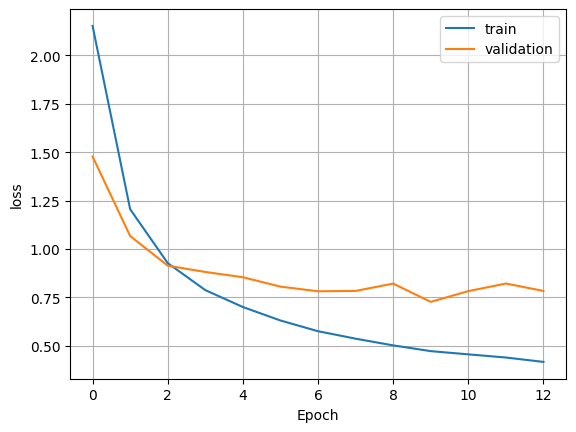

In [10]:
plot_loss(history)

In [11]:
result1 = model.evaluate(test_data_set)
result1

787/787 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7816 - loss: 0.6940


[0.7003745436668396, 0.7818059325218201]

## Model 2: Colour

In [12]:
# Get data - https://www.tensorflow.org/tutorials/load_data/images#load_data_using_a_keras_utility

# Parameters
batch_size = 125912
IMG_SIZE = (512, 512)
data_dir = './hagridset'
seed_no = 388741
validation_split = 0.3

# Dataset - https://stackoverflow.com/questions/66036271/splitting-a-tensorflow-dataset-into-training-test-and-validation-sets-from-ker

# Auto split to training set (70%)
training_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       validation_split = validation_split,
                                                       subset = 'training',
                                                       seed = seed_no,
                                                       color_mode = "rgb",
                                                       label_mode='categorical',
                                                       shuffle = True)

# Auto split to validation set and test set (30%)
validation_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       validation_split = validation_split,
                                                       subset = 'validation',
                                                       seed = seed_no,
                                                       color_mode = "rgb",
                                                       label_mode='categorical',
                                                       shuffle = True)

# Split further to validation set (10%) and test set (20%)
validation_batches = tf.data.experimental.cardinality(validation_data_set)
test_data_set = validation_data_set.take((2 * validation_batches) // 3)
validation_data_set = validation_data_set.skip((2 * validation_batches) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [13]:
# Number of classes
num_classes = len(training_data_set.class_names)
num_classes

# Model building
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model2.add(layers.Conv2D(12, 3, strides=2, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(18, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(24, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(48, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(96, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(192, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Flatten())
model2.add(layers.Dense(192, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))

In [14]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 12)   │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 128, 128, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 18)   │         1,962 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 24)     │         3,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         6,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 96)       │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         3,474 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 441,220 (1.68 MB)

 Trainable params: 441,220 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history2 = model2.fit(training_data_set, validation_data=validation_data_set, epochs=50, callbacks=[callback])

Epoch 1/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 178s 61ms/step - accuracy: 0.1620 - loss: 2.6216 - val_accuracy: 0.6541 - val_loss: 1.0953
Epoch 2/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 165s 60ms/step - accuracy: 0.6818 - loss: 1.0042 - val_accuracy: 0.7474 - val_loss: 0.8092
Epoch 3/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 177s 64ms/step - accuracy: 0.7686 - loss: 0.7400 - val_accuracy: 0.7923 - val_loss: 0.6654
Epoch 4/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 172s 62ms/step - accuracy: 0.8006 - loss: 0.6390 - val_accuracy: 0.7851 - val_loss: 0.6879
Epoch 5/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 165s 60ms/step - accuracy: 0.8178 - loss: 0.5786 - val_accuracy: 0.8145 - val_loss: 0.6092
Epoch 6/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 164s 59ms/step - accuracy: 0.8341 - loss: 0.5265 - val_accuracy: 0.8113 - val_loss: 0.6139
Epoch 7/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 161s 58ms/step - accuracy: 0.8438 - loss: 0.4951 - val_accuracy: 0.8297 - val_loss: 0.5730
Epoch 8/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 161s 58ms/step - accuracy: 

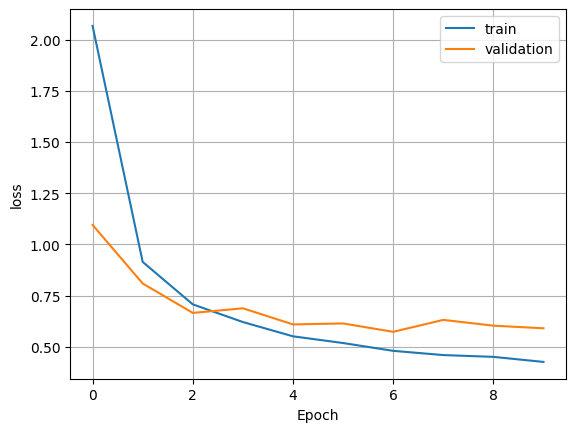

In [17]:
plot_loss(history2)

In [18]:
result2 = model2.evaluate(test_data_set)
result2

787/787 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8305 - loss: 0.5815


[0.5728193521499634, 0.8318774104118347]

# Model 3: Transfer Learning

In [19]:
# Get data - https://www.tensorflow.org/tutorials/load_data/images#load_data_using_a_keras_utility

# Parameters
batch_size = 125912
IMG_SIZE = (224, 224)
data_dir = './hagridset'
seed_no = 388741
validation_split = 0.3

# Dataset - https://stackoverflow.com/questions/66036271/splitting-a-tensorflow-dataset-into-training-test-and-validation-sets-from-ker

# Auto split to training set (70%)
training_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       validation_split = validation_split,
                                                       subset = 'training',
                                                       seed = seed_no,
                                                       color_mode = "rgb",
                                                       label_mode='categorical',
                                                       shuffle = True)

# Auto split to validation set and test set (30%)
validation_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       validation_split = validation_split,
                                                       subset = 'validation',
                                                       seed = seed_no,
                                                       color_mode = "rgb",
                                                       label_mode='categorical',
                                                       shuffle = True)

# Split further to validation set (10%) and test set (20%)
validation_batches = tf.data.experimental.cardinality(validation_data_set)
test_data_set = validation_data_set.take((2 * validation_batches) // 3)
validation_data_set = validation_data_set.skip((2 * validation_batches) // 3)

Found 125912 files belonging to 18 classes.
Using 88139 files for training.
Found 125912 files belonging to 18 classes.
Using 37773 files for validation.


In [20]:
# Parameters
num_classes = len(training_data_set.class_names)

# Building the Model
model3_base = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(IMG_SIZE[0], IMG_SIZE[1],3),
    include_top=False)
model3_base.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1],3))
x = model3_base(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model3 = tf.keras.Model(inputs, outputs)

# Compile the Model
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [21]:
model3.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 18)             │         9,234 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,723,922 (56.17 MB)

 Trainable params: 9,234 (36.07 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history3 = model3.fit(training_data_set, validation_data=validation_data_set, epochs=50, callbacks=[callback])

Epoch 1/50


I0000 00:00:1715814636.965584   45133 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_753', 20 bytes spill stores, 20 bytes spill loads

2024-05-16 00:10:41.643021: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng14{} for conv (f32[32,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,224,224]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-16 00:10:42.621046: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.979833756s
Trying algorithm eng14{} for conv (f32[32,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,224,224]{3,2,1,0}, f

2754/2755 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4052 - loss: 2.7569

I0000 00:00:1715815057.657466   47770 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_753', 4 bytes spill stores, 4 bytes spill loads



2755/2755 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.4052 - loss: 2.7565

I0000 00:00:1715815144.271770   48379 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_210', 4 bytes spill stores, 4 bytes spill loads



2755/2755 ━━━━━━━━━━━━━━━━━━━━ 519s 180ms/step - accuracy: 0.4053 - loss: 2.7562 - val_accuracy: 0.6178 - val_loss: 1.2857
Epoch 2/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 498s 181ms/step - accuracy: 0.6375 - loss: 1.1944 - val_accuracy: 0.6363 - val_loss: 1.2149
Epoch 3/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 490s 178ms/step - accuracy: 0.6506 - loss: 1.1518 - val_accuracy: 0.6383 - val_loss: 1.2007
Epoch 4/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 486s 176ms/step - accuracy: 0.6532 - loss: 1.1473 - val_accuracy: 0.6467 - val_loss: 1.2027
Epoch 5/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 485s 176ms/step - accuracy: 0.6544 - loss: 1.1530 - val_accuracy: 0.6407 - val_loss: 1.2368
Epoch 6/50
2755/2755 ━━━━━━━━━━━━━━━━━━━━ 496s 180ms/step - accuracy: 0.6547 - loss: 1.1466 - val_accuracy: 0.6394 - val_loss: 1.2352


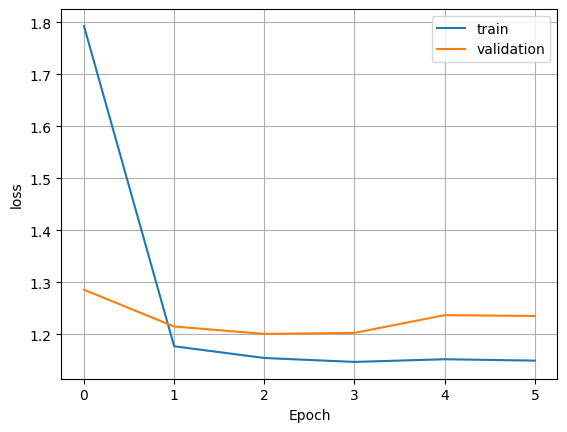

In [23]:
plot_loss(history3)

In [24]:
result3 = model3.evaluate(test_data_set)
result3

787/787 ━━━━━━━━━━━━━━━━━━━━ 122s 154ms/step - accuracy: 0.6456 - loss: 1.1852


[1.1889057159423828, 0.6479907631874084]

# Choosing the best model

In [25]:
print("Model 1 (Manual Greyscale): "+str(result1[1]))
print("Model 2 (Manual RGB): "+str(result2[1]))
print("Model 3 (Transfer Learning): "+str(result3[1]))

model_list = [model, model2, model3]
results_acc_list = [result1[1], result2[1], result3[1]]

Model 1 (Manual Greyscale): 0.7818059325218201
Model 2 (Manual RGB): 0.8318774104118347
Model 3 (Transfer Learning): 0.6479907631874084


In [26]:
# Get best accuracy
best_accuracy = max(results_acc_list)
best_accuracy_index = results_acc_list.index(best_accuracy)
print("Best Accuracy: "+str(best_accuracy))
print("Model Number: "+str(best_accuracy_index+1))

best_model = model_list[best_accuracy_index]

Best Accuracy: 0.8318774104118347
Model Number: 2


# Test with own images

In [27]:
# Parameters
batch_size = 125912
IMG_SIZE = (512, 512)
data_dir = './testing_own'
seed_no = 388741
validation_split = 0.3

# Dataset - https://stackoverflow.com/questions/66036271/splitting-a-tensorflow-dataset-into-training-test-and-validation-sets-from-ker

# Own testing data set
own_testing_data_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       image_size = IMG_SIZE,
                                                       shuffle = False)

Found 4 files belonging to 4 classes.


In [33]:
class_names = training_data_set.class_names

probability_model = tf.keras.Sequential([best_model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(own_testing_data_set)
df = pd.DataFrame(predictions, columns=class_names, index=own_testing_data_set.file_paths)
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


,call,dislike,fist,four,like,mute,ok,one,palm,peace,peace_inverted,rock,stop,stop_inverted,three,three2,two_up,two_up_inverted
./testing_own/ok/okay.jpg,0.050717,0.050717,0.050717,0.050717,0.050717,0.050717,0.137782,0.050717,0.050717,0.050717,0.050731,0.050717,0.050717,0.050717,0.050717,0.050733,0.050717,0.050717
./testing_own/one/one.jpg,0.050755,0.050753,0.050755,0.050753,0.051016,0.050753,0.050753,0.136756,0.050753,0.050758,0.050754,0.050754,0.050753,0.050754,0.050753,0.050753,0.050872,0.050803
./testing_own/peace/peace.jpg,0.051875,0.051874,0.051874,0.051877,0.051875,0.051874,0.057920,0.051875,0.051885,0.053818,0.064604,0.051875,0.051875,0.051874,0.052226,0.097044,0.051877,0.051879
./testing_own/stop/stop.jpg,0.050744,0.050744,0.050744,0.050745,0.050744,0.050744,0.050755,0.050744,0.051011,0.050744,0.050744,0.050744,0.137016,0.050803,0.050744,0.050744,0.050744,0.050744


In [34]:
df['Max'] = df.idxmax(axis=1)
df['Max']

./testing_own/ok/okay.jpg            ok
./testing_own/one/one.jpg           one
./testing_own/peace/peace.jpg    three2
./testing_own/stop/stop.jpg        stop
Name: Max, dtype: object